# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face Mask Segmentation
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__



'2.2.0'

### Change current working directory to project folder (1 mark)

In [ ]:
import os
import cv2
from PIL import Image
from skimage.transform import resize

import keras
import tensorflow as tf
from keras import backend as K

K.set_image_data_format('channels_last')

#### Add your code here ####
data_path='/gdrive/My Drive/Project/'
os.listdir('/gdrive/My Drive/Project/')

['SVHN_single_grey1.h5', 'images.npy']

In [ ]:
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
#### Add your code here ####
data = np.load('../gdrive/My Drive/Project/images.npy',allow_pickle=True)
data.shape
os.listdir()

['.config',
 'model-0.20.h5',
 'model-3.56.h5',
 'model-1.72.h5',
 'model-0.16.h5',
 'model-0.31.h5',
 'model-2.24.h5',
 'model-1.80.h5',
 'model-1.48.h5',
 'model-5.01.h5',
 'model-0.71.h5',
 'model-2.45.h5',
 'model-1.45.h5',
 'model-1.41.h5',
 'model-1.78.h5',
 'model-2.01.h5',
 'model-1.60.h5',
 'model-0.70.h5',
 'model-1.91.h5',
 'model-0.22.h5',
 'model-1.93.h5',
 'model-1.53.h5',
 'model-1.73.h5',
 'model-1.76.h5',
 'model-0.17.h5',
 'model-0.44.h5',
 'model-1.74.h5',
 'model-1.68.h5',
 'model-1.42.h5',
 'model-1.92.h5',
 'model-2.00.h5',
 'model-0.46.h5',
 'model-0.18.h5',
 'model-1.34.h5',
 'model-0.27.h5',
 'model-0.59.h5',
 'model-2.65.h5',
 'model-1.39.h5',
 'model-1.87.h5',
 'model-0.73.h5',
 'model-1.38.h5',
 'model-3.26.h5',
 'model-2.93.h5',
 'model-1.66.h5',
 'model-2.05.h5',
 'model-0.19.h5',
 'model-2.10.h5',
 'model-1.35.h5',
 'model-1.86.h5',
 'model-0.51.h5',
 'model-1.33.h5',
 'model-1.52.h5',
 'model-2.13.h5',
 'model-2.38.h5',
 'model-2.35.h5',
 'model-2.31.h5'

### Check one sample from the loaded "images.npy" file  (2 marks)
Hint - print data[10][1] 

In [ ]:
#### Add your code here ####
print(data[0][0])
print(data[0][1])
print(data[10][1])


[[[42 37 34]
  [56 51 48]
  [71 66 63]
  ...
  [23 33 34]
  [26 36 37]
  [28 38 39]]

 [[40 35 32]
  [51 46 43]
  [64 59 56]
  ...
  [27 36 35]
  [24 33 32]
  [26 35 34]]

 [[43 38 35]
  [51 46 43]
  [61 56 53]
  ...
  [28 30 27]
  [33 35 32]
  [35 37 34]]

 ...

 [[56 47 40]
  [57 48 41]
  [61 52 45]
  ...
  [67 48 42]
  [55 35 28]
  [60 40 33]]

 [[53 44 37]
  [54 45 38]
  [57 48 41]
  ...
  [59 40 34]
  [60 40 33]
  [54 34 27]]

 [[53 44 37]
  [54 45 38]
  [57 48 41]
  ...
  [59 40 34]
  [70 50 43]
  [64 44 37]]]
[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}]
[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.77166

In [ ]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH)) 
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (2 marks)

In [ ]:
#### Add your code here ####
print(X_train.shape)

(409, 224, 224, 3)


In [ ]:
#### Add your code here ####
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

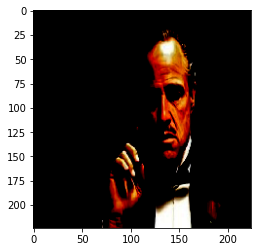

In [ ]:
from matplotlib import pyplot
print(X_train[10])
pyplot.imshow(X_train[10])

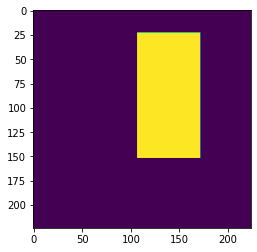

In [ ]:
pyplot.imshow(masks[10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


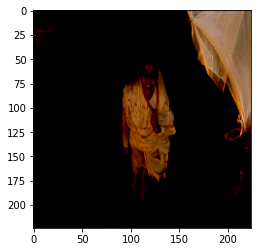

In [ ]:
pyplot.imshow(X_train[25])

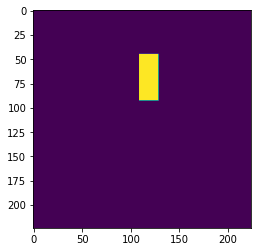

In [ ]:
pyplot.imshow(masks[25])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [ ]:
pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.2)


In [ ]:
import keras
print('keras: %s' % keras.__version__)

keras: 2.3.1


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights= "imagenet")

    
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output


    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)
    

### Call the create_model function

In [ ]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(False)

# Print summary
model.summary()

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_19[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
___________________________________________________________________________________________

### Define dice coefficient function (10 marks)
- Create a function to calculate dice coefficient


In [ ]:
def dice_coefficient(y_true, y_pred):
    #### Add your code here ####
    numerator=2*tensorflow.reduce_sum(y_true*y_pred)
    denominator=tensorflow.reduce_sum(y_true+y_pred)
    ##return #### Add your code here ####

    return numerator/(denominator+tensorflow.keras.backend.epsilon())

### Define loss

In [ ]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
#### Add your code here ####
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer=Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss,optimizer=optimizer,metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")



### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [ ]:
#### Add your code here ####
my_callback=[
    stop,
    checkpoint,
    reduce_lr, 
    ]
model.fit(X_train,masks,epochs=20,batch_size=1,verbose=1,callbacks=my_callback)


Epoch 00015: loss did not improve from 0.12001
310/409 [=====================>........] - ETA: 9s - loss: 0.2265 - dice_coefficient: 0.8595 
Epoch 00015: loss did not improve from 0.12001
311/409 [=====================>........] - ETA: 9s - loss: 0.2260 - dice_coefficient: 0.8598
Epoch 00015: loss did not improve from 0.12001
312/409 [=====================>........] - ETA: 9s - loss: 0.2260 - dice_coefficient: 0.8597
Epoch 00015: loss did not improve from 0.12001
313/409 [=====================>........] - ETA: 9s - loss: 0.2260 - dice_coefficient: 0.8597
Epoch 00015: loss did not improve from 0.12001
314/409 [======================>.......] - ETA: 9s - loss: 0.2260 - dice_coefficient: 0.8597
Epoch 00015: loss did not improve from 0.12001
315/409 [======================>.......] - ETA: 9s - loss: 0.2258 - dice_coefficient: 0.8599
Epoch 00015: loss did not improve from 0.12001
316/409 [======================>.......] - ETA: 9s - loss: 0.2255 - dice_coefficient: 0.8599
Epoch 00015: loss 

### Get the predicted mask for a sample image   (5 marks)

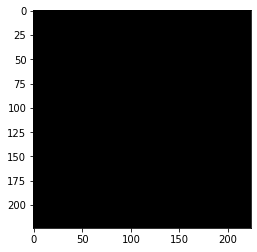

In [ ]:
import matplotlib.pyplot as plt
n = 27
sample_image = X_train[n]
#### Add your code here ####
image = cv2.resize(sample_image,(IMAGE_WIDTH,IMAGE_HEIGHT))
#image=np.expand_dims(sample_image,axis=0)
feat_scaled=preprocess_input(np.array(image,dtype=np.float32))
a=1.0*(model.predict(np.array([feat_scaled]))[0]>0.5)
pred_mask = cv2.resize(a,(IMAGE_WIDTH,IMAGE_HEIGHT))


image2=image
image2[:,:,0]=pred_mask*image[:,:,0]
image2[:,:,1]=pred_mask*image[:,:,1]
image2[:,:,2]=pred_mask*image[:,:,2]

out_image=image2
plt.imshow(out_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


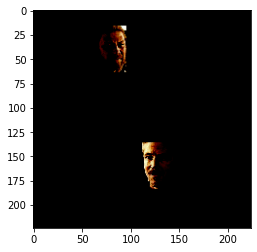

In [ ]:
#IMPROVED VERSION OF THE SAME#

import matplotlib.pyplot as plt
n = 27
sample_image = X_train[n]
#### Add your code here ####
image = cv2.resize(sample_image,(IMAGE_WIDTH,IMAGE_HEIGHT))
#image=np.expand_dims(sample_image,axis=0)
#feat_scaled=preprocess_input(np.array(image,dtype=np.float32))
a=(1.0*(model.predict(np.array([image]))[0]>0.5))
pred_mask = cv2.resize(a,(IMAGE_WIDTH,IMAGE_HEIGHT))


image2=image
image2[:,:,0]=pred_mask*image[:,:,0]
image2[:,:,1]=pred_mask*image[:,:,1]
image2[:,:,2]=pred_mask*image[:,:,2]

out_image=image2
plt.imshow(out_image)

### Impose the mask on the image (5 marks)

In [ ]:
#### Add your code here ####
WEIGHTS_FILE = "model-0.27.h5"
THRESHOLD = 0.8
EPSILON = 0.02

model=create_model()
model.load_weights(WEIGHTS_FILE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


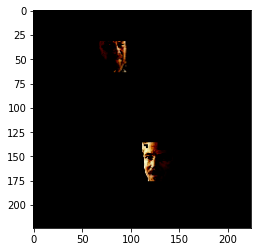

In [ ]:
import matplotlib.pyplot as plt
n = 27
sample_image = X_train[n]
#### Add your code here ####
image = cv2.resize(sample_image,(IMAGE_WIDTH,IMAGE_HEIGHT))
#image=np.expand_dims(sample_image,axis=0)
#feat_scaled=preprocess_input(np.array(image,dtype=np.float32))
a=(1.0*(model.predict(np.array([image]))[0]>0.5))
pred_mask = cv2.resize(a,(IMAGE_WIDTH,IMAGE_HEIGHT))


image2=image
image2[:,:,0]=pred_mask*image[:,:,0]
image2[:,:,1]=pred_mask*image[:,:,1]
image2[:,:,2]=pred_mask*image[:,:,2]

out_image=image2
plt.imshow(out_image)